In [66]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pandas import read_csv

In [67]:
def n_to_lambda(n):
    A = -49852133
    B = 86092018.9
    C = -29983328.35
    D = -14354236.56
    E = 835425.05
    F = 5647432.02
    G = 1863438.86
    H = -2719226.18
    I = 574967.82
    return 3000 / np.sqrt(np.polyval([I, H, G, F, E, D, C, B, A], n))

def rel_angle_to_wavelength(rel_angle):
    init = 78.388 # +- 0.083
    angle = (init - rel_angle) / 376.761 * 2 * np.pi
    n = np.sqrt(np.power(2 / np.sqrt(3) * np.sin(angle) + 1/2, 2) + 3/4)
    
    wavelength = n_to_lambda(n) * 1e-9
    return wavelength



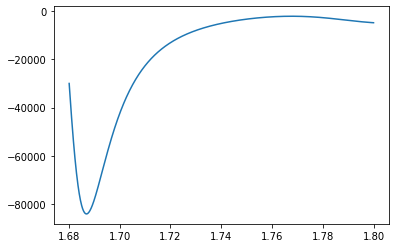

In [68]:

n = np.linspace(1.68, 1.8, 1000)
wl = n_to_lambda(n)
# plt.plot(n, wl)
plt.plot(n[1:], np.diff(wl)/np.diff(n))
plt.show()

In [69]:
print(f"{rel_angle_to_wavelength(20.1) * 1843.30:.3e}")

2.925e-03


In [70]:
def get_temperature(V, I):
    rho = 5.65 * (V / I  - 0.321) / 1.272
    T = 103+38.1*rho-0.095*rho**2 +2.48e-4*rho**3
    return T

Max wavelength: 1.715e-06
Temperature: 1487.168
Wien: 2.550e-03


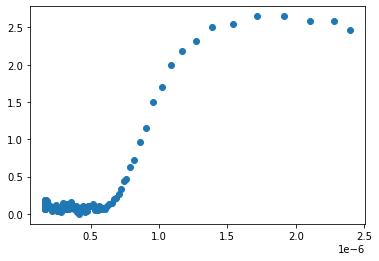

In [71]:
filepath = "data\\3_069v_0_330A.csv"
filename = filepath.split("\\")[-1]
V = float(filename[0:filename.find("v")].replace("_", "."))
I = float(filename[filename.find("v_")+2:filename.find("A")].replace("_", "."))

data = read_csv(filepath)
angle = data.iloc[1:, 1].to_numpy()
intensity = data.iloc[1:, -1].to_numpy()

init = 78.388 # +- 0.083
angle = (init - angle) / 376.761 * 2 * np.pi
n = np.sqrt(np.power(2 / np.sqrt(3) * np.sin(angle) + 1/2, 2) + 3/4)
n = n[np.where(n > 1.68)]
intensity = intensity[np.where(n > 1.68)]
wavelength = n_to_lambda(n) * 1e-9
plt.scatter(wavelength, intensity)

max_wavelength = wavelength[np.argmax(intensity)]
print(f"Max wavelength: {max_wavelength:.3e}")
temperature = get_temperature(V, I)
print(f"Temperature: {temperature:.3f}")
print(f"Wien: {temperature * max_wavelength:.3e}")

In [72]:
filepaths = glob("data/*")
max_wavelengths = []
temperatures = []
all_rad = []
all_wav = []

for i, filepath in enumerate(filepaths):
    filename = filepath.split("\\")[-1]
    V = float(filename[0:filename.find("v")].replace("_", "."))
    I = float(filename[filename.find("v_")+2:filename.find("A")].replace("_", "."))
    
    data = read_csv(filepath)
    angle = data.iloc[1:, 1].to_numpy()
    intensity = data.iloc[1:, -1].to_numpy()

    init = 78.388 # +- 0.083
    angle = (init - angle) / 376.761 * 2 * np.pi
    n = np.sqrt(np.power(2 / np.sqrt(3) * np.sin(angle) + 1/2, 2) + 3/4)
    n = n[np.where(n > 1.68)]
    intensity = intensity[np.where(n > 1.68)]
    wavelength = n_to_lambda(n) * 1e-9
    all_rad.append([intensity])
    all_wav.append(wavelength)
    
    max_angle = angle[np.argmax(intensity)]
    # print(max_angle, filepath)
    # plt.figure(f'i')
    # plt.scatter(wave, intensity)
    # plt.vlines(x=rel_angle_to_wavelength(max_angle), ymin=0, ymax=max_intensity, color='red')
    # plt.show()

    max_wavelengths.append(wavelength[np.argmax(intensity)])
    temperatures.append(get_temperature(V, I))
    print(filename)
    print(f"temperature = {temperatures[-1]:.3e}")
    print(f"max_wavelength = {max_wavelengths[-1]:.3e}")
    print(f"wien = {temperatures[-1] * max_wavelengths[-1]:.3e}")
    print("------")
temperatures = np.array(temperatures)
max_wavelengths = np.array(max_wavelengths)


3_069v_0_330A.csv
temperature = 1.487e+03
max_wavelength = 1.715e-06
wien = 2.550e-03
------


3_247v_0_341A.csv
temperature = 1.518e+03
max_wavelength = 1.854e-06
wien = 2.815e-03
------
4_579v_0_413A.csv
temperature = 1.735e+03
max_wavelength = 1.863e-06
wien = 3.232e-03
------
4_732v_0_422A.csv
temperature = 1.752e+03
max_wavelength = 1.513e-06
wien = 2.650e-03
------
6_322v_0_496A.csv
temperature = 1.958e+03
max_wavelength = 1.596e-06
wien = 3.125e-03
------
6_526v_0_505A.csv
temperature = 1.981e+03
max_wavelength = 1.624e-06
wien = 3.218e-03
------
7_056v_0_528A.csv
temperature = 2.040e+03
max_wavelength = 1.311e-06
wien = 2.673e-03
------
7_262v_0_535A.csv
temperature = 2.067e+03
max_wavelength = 1.654e-06
wien = 3.419e-03
------
9_029v_0_605A.csv
temperature = 2.242e+03
max_wavelength = 6.309e-07
wien = 1.415e-03
------


In [73]:
def calc_area(x, y):
    y_av = np.array([(y[i] + y[i+1])/2 for i in range(len(y) - 1)])
    dx = np.diff(x)
    return y_av @ dx

In [74]:
areas = []
for l, r in zip(all_wav, all_rad):
    a = calc_area(l, r[0])
    areas.append(a)

140 140
3.778881890614975e-06
119 119
2.9549615037127e-06
162 162
6.0206610766373276e-06
304 304
6.181014803605787e-06
260 260
1.0356471518670087e-05
136 136
1.3356295022042177e-05
151 151
1.7150155211989478e-05
151 151
1.6193545851150367e-05
332 332
nan


3.147e-03 x+-1.889e-07


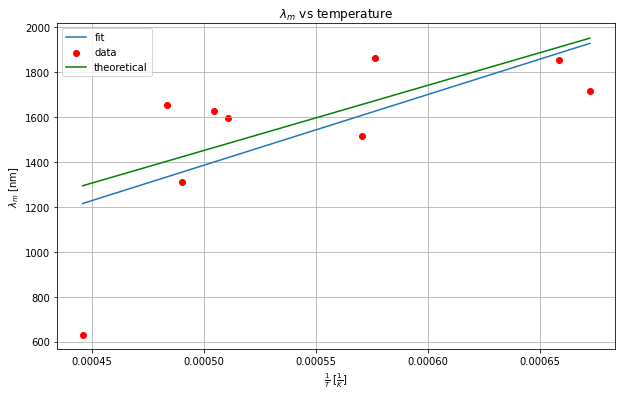

In [75]:
[a, b] = np.polyfit(1 / temperatures, max_wavelengths, 1)
plt.figure('', figsize=(10, 6))
print(f"{a:.3e} x+{b:.3e}")
ts = np.linspace(1 / temperatures.min(), 1 / temperatures.max(), 100)
plt.title(f'$\lambda_m$ vs temperature')
plt.xlabel('$\\frac{1}{T}$ [$\\frac{1}{K}$]')
plt.ylabel(f'$\lambda_m$ [nm]')
plt.plot(ts, 10**9 *(a * ts + b))
plt.scatter(1 / temperatures, 10**9 * max_wavelengths, color="red")
plt.plot(ts, 2.9e-3 * ts*10**9, color="green")
plt.grid()
plt.legend(["fit", "data", "theoretical"])

In [76]:
rel_err = np.abs(a - 2.9e-3) / 2.9e-3
print(f"Relative error: {rel_err * 100:.1f}%")

Relative error: 8.5%


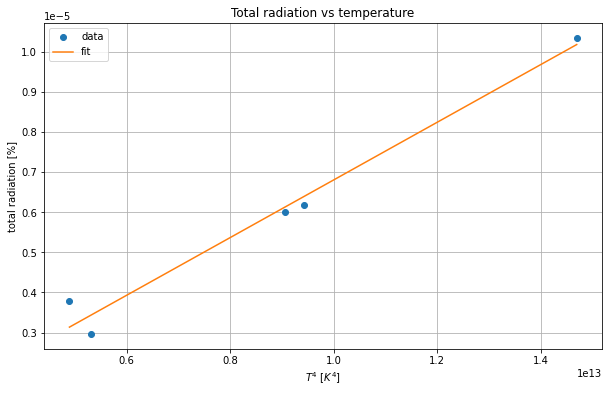

In [82]:
temperatures, areas = temperatures[:-1], areas[:-1]
plt.figure('t', figsize=(10, 6))
[a, b] = np.polyfit(temperatures**4, areas, deg=1)
plt.plot(temperatures**4, areas, 'o', label='data')
plt.plot(temperatures**4, a*temperatures**4 + b, label='fit')
plt.xlabel('$T^4$ [$K^4$]')
plt.ylabel('total radiation [%]')
plt.title('Total radiation vs temperature')
plt.grid()
plt.legend()